In [1]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import annotate
import rate

In [2]:
data = annotate.get_clean()

In [3]:
rate.setkey(1)

In [4]:
async def estimate_cost(requests, avg_of=25):
    tokens_in, tokens_out = [], []
    def process(request, completion, **kwargs):
        nonlocal tokens_in, tokens_out
        tokens_in.append(completion['usage']['prompt_tokens'])
        tokens_out.append(completion['usage']['completion_tokens'])

    rq = np.random.choice(requests, avg_of)
    for r in rq:
        r['process'] = process
    t0 = time.time()
    await rate.entrypoint(rq, num_procs=1, n=1, model='gpt-4', temperature=0)
    t = (time.time() - t0) / avg_of
    prompt_tokens = np.mean(tokens_in)
    response_tokens = np.mean(tokens_out)
    # cost = prompt_tokens/1000 * 0.03, response_tokens/1000 * 0.06
    return t, prompt_tokens, response_tokens

In [5]:
cost = pd.DataFrame(columns=['Time', 'Prompt tokens', 'Response tokens'])  # per item and rating

In [7]:
import n_1r1i as method
key = '1 rating\n1 item'
rq = method.get_requests(data)
values = await estimate_cost(rq)
cost.loc[key] = dict(zip(cost.columns, values))

Request 1 of 25
Request 2 of 25
Request 3 of 25
Request 4 of 25
Request 5 of 25
Request 6 of 25
Request 7 of 25
Request 8 of 25
Request 9 of 25
Request 10 of 25
Request 11 of 25
Request 12 of 25
Request 13 of 25
Request 14 of 25
Request 15 of 25
Request 16 of 25
Request 17 of 25
Request 18 of 25
Request 19 of 25
Request 20 of 25
Request 21 of 25
Request 22 of 25
Request 23 of 25
Request 24 of 25
Request 25 of 25


In [8]:
import n_3r1i as method
key = '3 ratings\n1 item'
rq = method.get_requests(data)
values = await estimate_cost(rq)
cost.loc[key] = dict(zip(cost.columns, [v/3 for v in values]))

Request 1 of 25
Request 2 of 25
Request 3 of 25
Request 4 of 25
Request 5 of 25
Request 6 of 25
Request 7 of 25
Request 8 of 25
Request 9 of 25
Request 10 of 25
Request 11 of 25
Request 12 of 25
Request 13 of 25
Request 14 of 25
Request 15 of 25
Request 16 of 25
Request 17 of 25
Request 18 of 25
Request 19 of 25
Request 20 of 25
Request 21 of 25
Request 22 of 25
Request 23 of 25
Request 24 of 25
Request 25 of 25


In [9]:
import n_1rxi as method
chunk_size = 10
key = f'1 rating\n{chunk_size} items'
rq = method.get_requests(data, chunk_size=chunk_size, measures=['novelty', 'feasibility', 'value'])
values = await estimate_cost(rq)
cost.loc[key] = dict(zip(cost.columns, [v/chunk_size for v in values]))

Request 1 of 25
Request 2 of 25
Request 3 of 25
Request 4 of 25
Request 5 of 25
Request 6 of 25
Request 7 of 25
Request 8 of 25
Request 9 of 25
Request 10 of 25
Request 11 of 25
Request 12 of 25
Request 13 of 25
Request 14 of 25
Request 15 of 25
Request 16 of 25
Request 17 of 25
Request 18 of 25
Request 19 of 25
Request 20 of 25
Request 21 of 25
Request 22 of 25
Request 23 of 25
Request 24 of 25
Request 25 of 25


In [10]:
import n_1rxi as method
chunk_size = 20
key = f'1 rating\n{chunk_size} items'
rq = method.get_requests(data, chunk_size=chunk_size, measures=['novelty', 'feasibility', 'value'])
values = await estimate_cost(rq)
cost.loc[key] = dict(zip(cost.columns, [v/chunk_size for v in values]))

Request 1 of 25
Request 2 of 25
Request 3 of 25
Request 4 of 25
Request 5 of 25
Request 6 of 25
Request 7 of 25
Request 8 of 25
Request 9 of 25
Request 10 of 25
Request 11 of 25
Request 12 of 25
Request 13 of 25
Request 14 of 25
Request 15 of 25
Request 16 of 25
Request 17 of 25
Request 18 of 25
Request 19 of 25
Request 20 of 25
Request 21 of 25
Request 22 of 25
Request 23 of 25
Request 24 of 25
Request 25 of 25


In [11]:
import s_1rxi as method
chunk_size = 10
key = f'1 rating\n{chunk_size} items\n10 samples'
rq = method.get_requests(data, chunk_size=chunk_size)
values = await estimate_cost(rq)
cost.loc[key] = dict(zip(cost.columns, [v/chunk_size for v in values]))

Request 1 of 25
Request 2 of 25
Request 3 of 25
Request 4 of 25
Request 5 of 25
Request 6 of 25
Request 7 of 25
Request 8 of 25
Request 9 of 25
Request 10 of 25
Request 11 of 25
Request 12 of 25
Request 13 of 25
Request 14 of 25
Request 15 of 25
Request 16 of 25
Request 17 of 25
Request 18 of 25
Request 19 of 25
Request 20 of 25
Request 21 of 25
Request 22 of 25
Request 23 of 25
Request 24 of 25
Request 25 of 25


In [12]:
import s_1rxi as method
chunk_size = 20
key = f'1 rating\n{chunk_size} items\n10 samples'
rq = method.get_requests(data, chunk_size=chunk_size)
values = await estimate_cost(rq)
cost.loc[key] = dict(zip(cost.columns, [v/chunk_size for v in values]))

Request 1 of 25
Request 2 of 25
Request 3 of 25
Request 4 of 25
Request 5 of 25
Request 6 of 25
Request 7 of 25
Request 8 of 25
Request 9 of 25
Request 10 of 25
Request 11 of 25
Request 12 of 25
Request 13 of 25
Request 14 of 25
Request 15 of 25
Request 16 of 25
Request 17 of 25
Request 18 of 25
Request 19 of 25
Request 20 of 25
Request 21 of 25
Request 22 of 25
Request 23 of 25
Request 24 of 25
Request 25 of 25


In [13]:
import n_1rxi_numeric as method
chunk_size = 20
key = f'1 rating\n{chunk_size} items\nrating-only'
rq = method.get_requests(data, chunk_size=chunk_size, measures=['novelty', 'feasibility', 'value'])
values = await estimate_cost(rq)
cost.loc[key] = dict(zip(cost.columns, [v/chunk_size for v in values]))

Request 1 of 25


Request 2 of 25
Request 3 of 25
Request 4 of 25
Request 5 of 25
Request 6 of 25
Request 7 of 25
Request 8 of 25
Request 9 of 25
Request 10 of 25
Request 11 of 25
Request 12 of 25
Request 13 of 25
Request 14 of 25
Request 15 of 25
Request 16 of 25
Request 17 of 25
Request 18 of 25
Request 19 of 25
Request 20 of 25
Request 21 of 25
Request 22 of 25
Request 23 of 25
Request 24 of 25
Request 25 of 25


In [14]:
import s_1rxi_numeric as method
chunk_size = 20
key = f'1 rating\n{chunk_size} items\nrating-only\n10 samples'
rq = method.get_requests(data, chunk_size=chunk_size, measures=['novelty', 'feasibility', 'value'])
values = await estimate_cost(rq)
cost.loc[key] = dict(zip(cost.columns, [v/chunk_size for v in values]))

Request 1 of 25
Request 2 of 25
Request 3 of 25
Request 4 of 25
Request 5 of 25
Request 6 of 25
Request 7 of 25
Request 8 of 25
Request 9 of 25
Request 10 of 25
Request 11 of 25
Request 12 of 25
Request 13 of 25
Request 14 of 25
Request 15 of 25
Request 16 of 25
Request 17 of 25
Request 18 of 25
Request 19 of 25
Request 20 of 25
Request 21 of 25
Request 22 of 25
Request 23 of 25
Request 24 of 25
Request 25 of 25


In [ ]:
cost.to_csv('cost-estimates.csv')

In [2]:
cost = pd.read_csv('cost-estimates.csv').set_index('Unnamed: 0')

In [3]:
cost['Prompt cost'] = cost['Prompt tokens'] * 0.000_03
cost['Response cost'] = cost['Response tokens'] * 0.000_06

In [4]:
newindex = [a
            .replace('rating\n', 'dim, ')
            .replace('ratings\n', 'dims, ')
            .replace('only\n', 'only, ')
            .replace('item', 'answer') for a in cost.index]
longlabel = [a.replace('\n',', ').replace('item', 'answer') for a in cost.index]
cost['label'] = newindex
cost['longlabel'] = longlabel
cost['rank'] = [1,2,3,4,6,7,5,8]
cost.sort_values('rank', inplace=True)
cost

,Time,Prompt tokens,Response tokens,Prompt cost,Response cost,label,longlabel,rank
Unnamed: 0,,,,,,,,
1 rating\n1 item,10.891992,227.480000,135.680000,0.006824,0.008141,"1 dim, 1 answer","1 rating, 1 answer",1
3 ratings\n1 item,8.474512,128.453333,104.546667,0.003854,0.006273,"3 dims, 1 answer","3 ratings, 1 answer",2
1 rating\n10 items,3.607310,36.456000,47.992000,0.001094,0.002880,"1 dim, 10 answers","1 rating, 10 answers",3
1 rating\n20 items,3.354576,22.784000,44.528000,0.000684,0.002672,"1 dim, 20 answers","1 rating, 20 answers",4
1 rating\n20 items\nrating-only,0.457423,17.922000,5.148000,0.000538,0.000309,"1 dim, 20 answers\nrating-only","1 rating, 20 answers, rating-only",5
1 rating\n10 items\n10 samples,3.642363,52.220000,45.604000,0.001567,0.002736,"1 dim, 10 answers\n10 samples","1 rating, 10 answers, 10 samples",6
1 rating\n20 items\n10 samples,3.408435,30.858000,43.120000,0.000926,0.002587,"1 dim, 20 answers\n10 samples","1 rating, 20 answers, 10 samples",7
1 rating\n20 items\nrating-only\n10 samples,0.417439,26.182000,4.950000,0.000785,0.000297,"1 dim, 20 answers\nrating-only, 10 samples","1 rating, 20 answers, rating-only, 10 samples",8


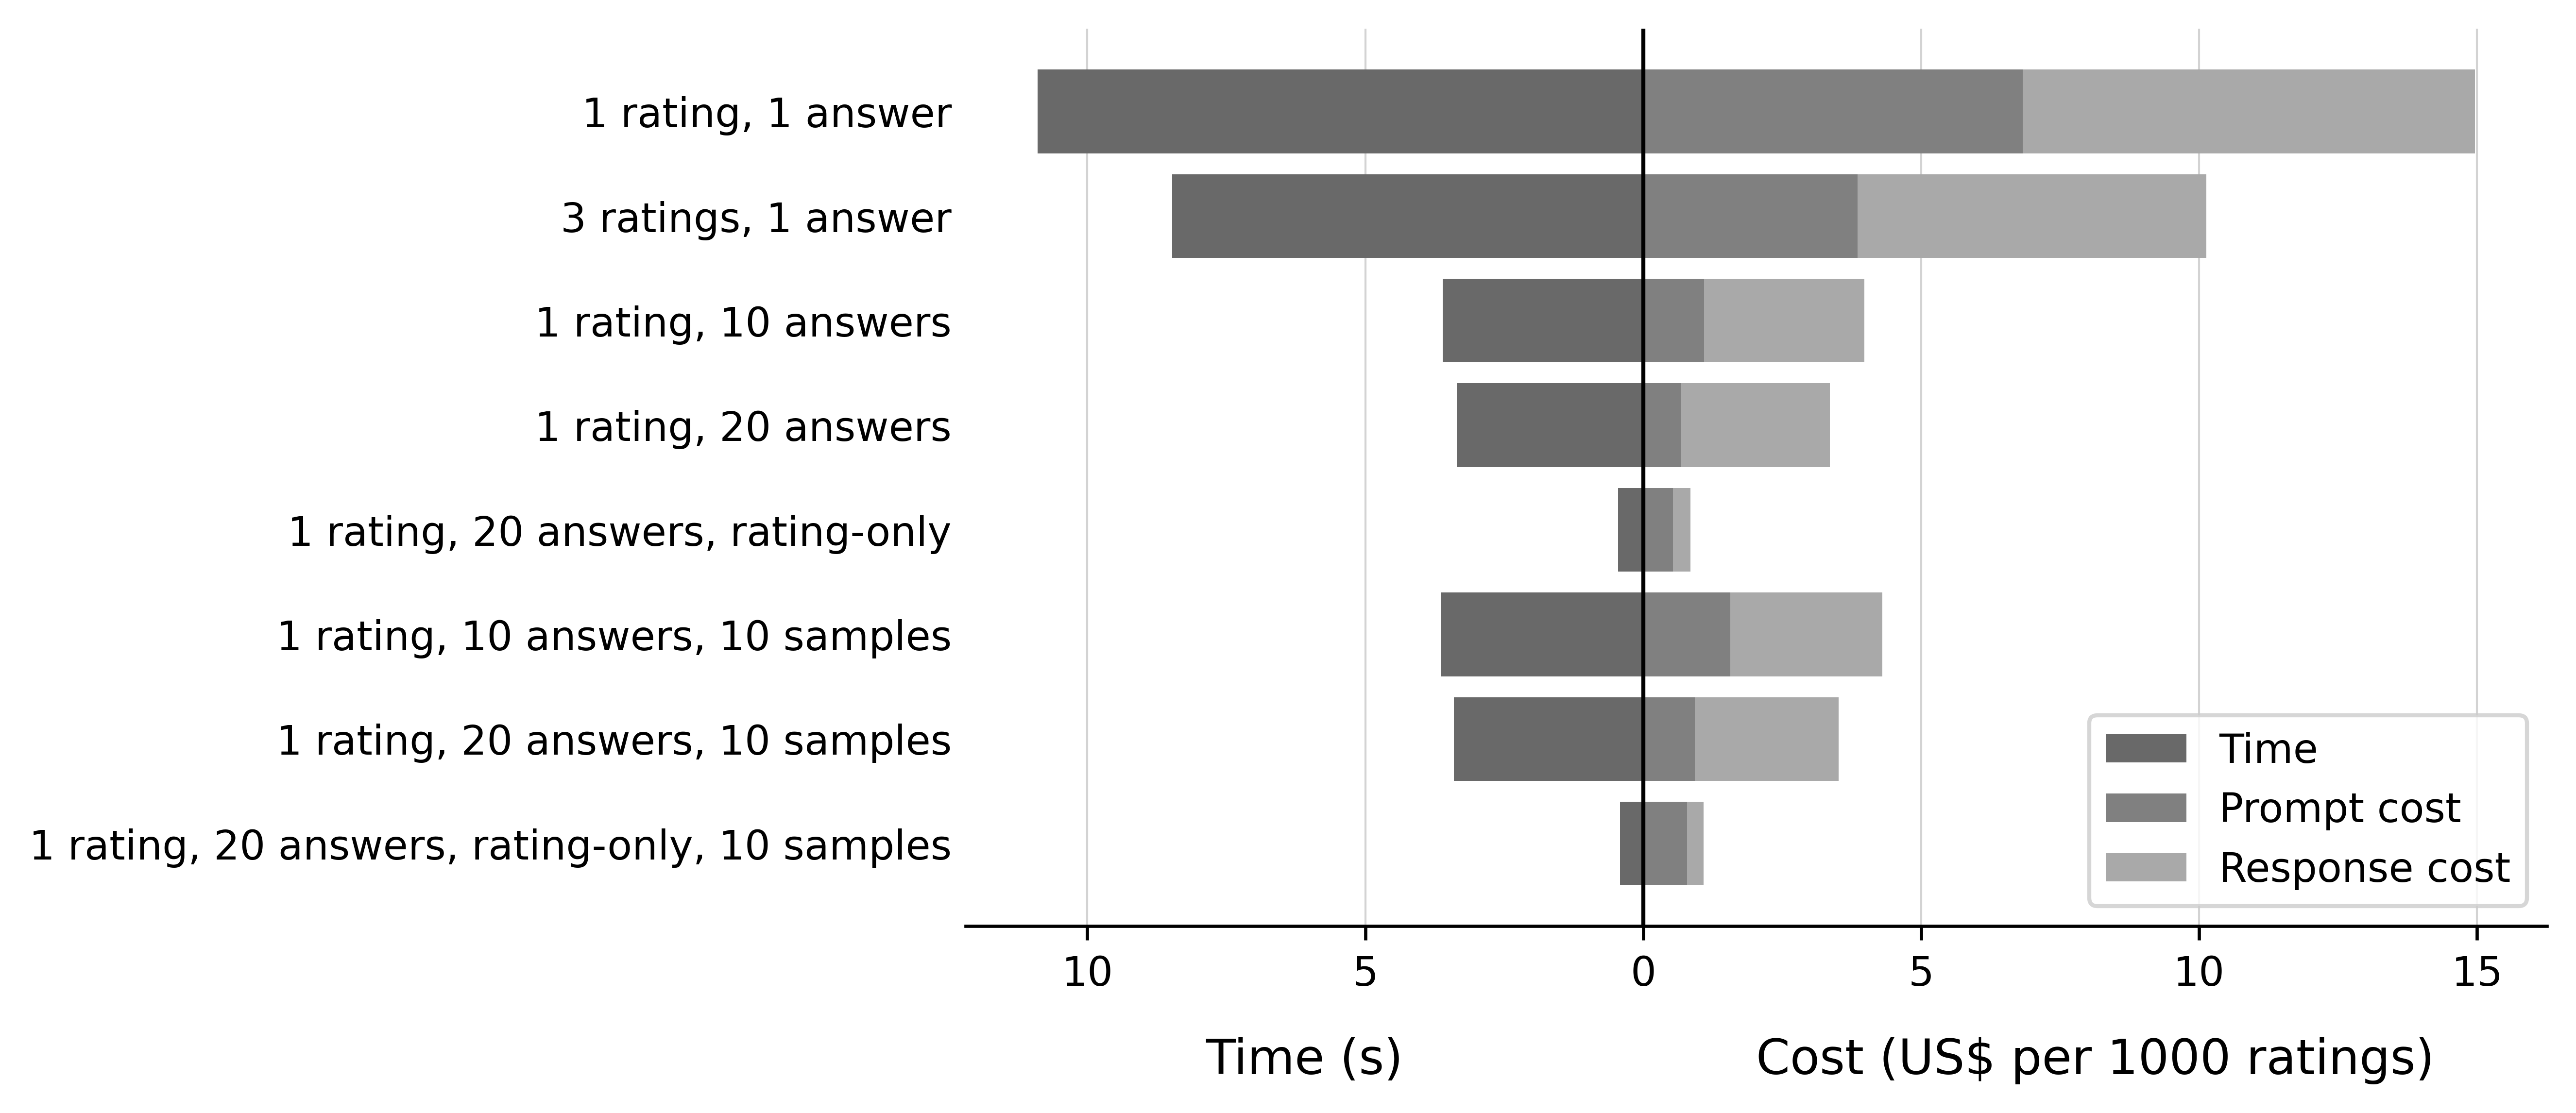

In [5]:
fig, ax = plt.subplots(figsize=(7,4), dpi=600)
ax.grid(axis='x', color='lightgrey', lw=.5)
ax.set_axisbelow(True)
ax.invert_yaxis()

scale = 1000
ax.barh(cost['longlabel'], -cost['Time'], color='dimgrey', label='Time')
ax.barh(cost['longlabel'], cost['Prompt cost']*scale, color='grey', label='Prompt cost')
ax.barh(cost['longlabel'], cost['Response cost']*scale, left=cost['Prompt cost']*scale, color='darkgrey', label='Response cost')

ax.legend(loc='lower right')
ax.tick_params('y', length=0)

ax.axvline(0, c='k', lw=1)
ticks = ax.get_xticks()
ax.set_xticks(ticks[1:-1], [int(abs(t)) for t in ticks[1:-1]])


left = ax.get_xlim()[0]/2
right = ax.get_xlim()[1]/2
bottom = len(cost) + 1.2
ax.annotate('Time (s)', xy=(left, bottom), xycoords=ax.transData, ha='center', fontsize=12)
ax.annotate('Cost (US$ per 1000 ratings)', xy=(right, bottom), xycoords=ax.transData, ha='center', fontsize=12)

sns.despine(left=True)
plt.savefig('Figure_4.pdf')

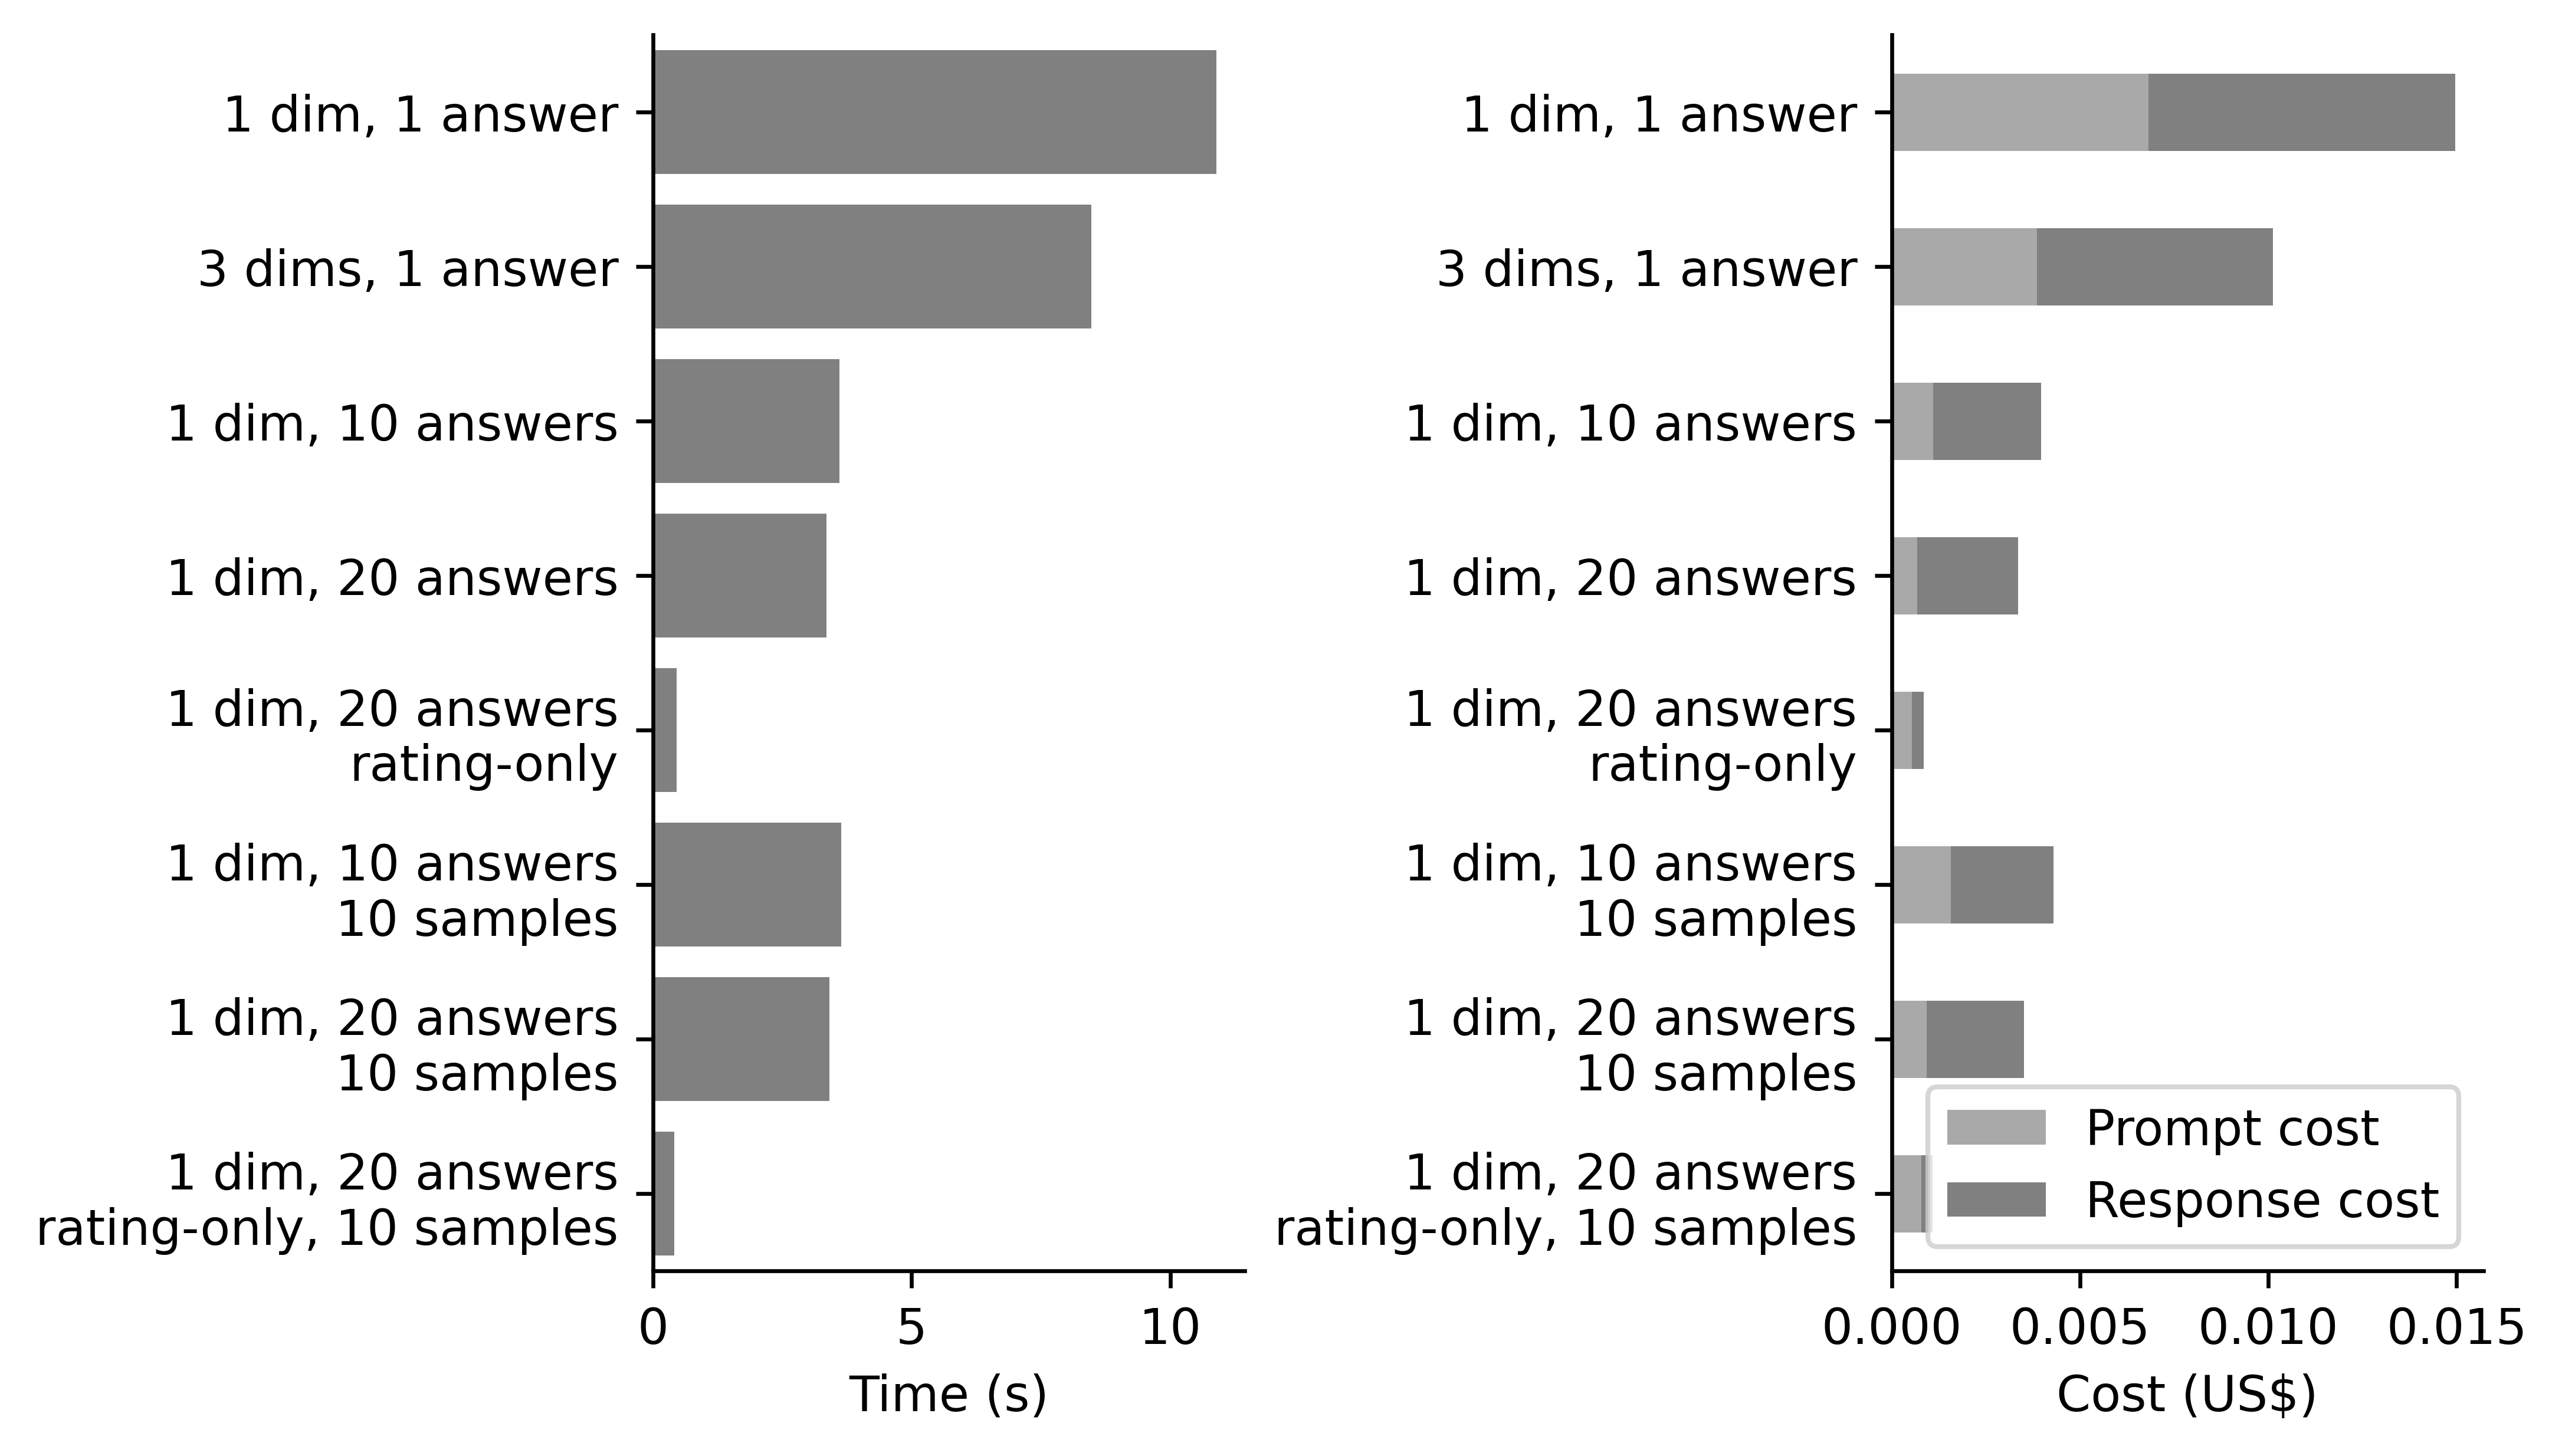

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(7,4), layout='constrained', dpi=600)

sns.barplot(cost, y='label', x='Time', color='grey', ax=axs[0])
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('')

cost.plot(kind='barh', x='label', y=['Prompt cost', 'Response cost'], stacked=True, color=['darkgrey', 'grey'], ax=axs[1])
axs[-1].invert_yaxis()
# sns.barplot(cost, y='label', x='Cost', color='grey', ax=axs[1])
axs[1].set_xlabel('Cost (US$)')
axs[1].set_ylabel('')

sns.despine()
# plt.savefig('Figure_4.pdf')